In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path
#insert

In [6]:
sys.path.insert(0,r"C:\Users\Karryvrcs\Desktop\datamining\env\.venv\Lib\site-packages")

In [536]:
train_set = pd.read_csv("train.csv", dtype={"Class": "int"}, index_col="id")
test_set = pd.read_csv("test.csv")

train_set.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
id,,,,,,,,,,,,,,,,,,,,,
0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,0.742144,...,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98,0
1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,-0.109948,...,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00,0
2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,-0.042027,...,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69,0
3,0.0,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,0.885838,...,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00,0
4,0.0,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,0.692665,...,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00,0


## Exploratory data analysis

In [464]:
eda_train = train_set.copy()
eda_test = test_set.copy()

### 1. Time

Conclusion: Fraudulent transactions are significantly more likely to occur at midnight.

Firstly, I split the Time into day and hour. The training set and the test set include different times.

Then, I calculate the percentage of fraudulent transactions on Day 0 and Day 1 (Train_set). The fraud transaction rate on the DAY 1 is higher than on the DAY 0.

In [465]:
eda_train["day"] = eda_train["Time"] // (86400)
eda_train["hour"] = (eda_train["Time"] % (86400)) // 3600

eda_test["day"] = eda_test["Time"] // (86400)
eda_test["hour"] = (eda_test["Time"] % (86400)) // 3600


for i in range(0, 2):
    result = eda_train[eda_train["day"] == i]
    print("DAY", i, np.mean(result["Class"]))

DAY 0 0.0019280305582477727
DAY 1 0.0037042694569617354


In [466]:
eda_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,day,hour
id,,,,,,,,,,,,,,,,,,,,,
0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,0.742144,...,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98,0,0.0,0.0
1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,-0.109948,...,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00,0,0.0,0.0
2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,-0.042027,...,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69,0,0.0,0.0
3,0.0,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,0.885838,...,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00,0,0.0,0.0
4,0.0,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,0.692665,...,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219124,120580.0,1.891079,-1.272908,-3.783908,-1.388939,2.012789,2.666080,0.151740,0.401934,-1.102824,...,-0.069571,0.756765,0.244479,-0.147566,-0.054725,-0.044588,198.65,0,1.0,9.0
219125,120580.0,0.139724,0.948649,-2.913655,-2.184829,1.883716,-1.056824,1.725624,0.018089,-0.823494,...,-0.085398,-0.091409,-1.053488,0.467570,0.358918,0.294735,24.00,0,1.0,9.0
219126,120580.0,2.058343,-0.038993,-1.928553,0.330117,0.270127,-0.735664,-0.173878,0.144823,0.849289,...,0.307799,-0.021434,-0.343989,0.181065,-0.098387,-0.044064,1.79,0,1.0,9.0


#### Time slot:

Train_set: 
* Day 0, hour 0 - 23  
* Day 1, hour 0 - 9

Test_set: 
* Day 1, hour 9 - 23

It may because the fraudulent transactions are more likely to occur at midnight.

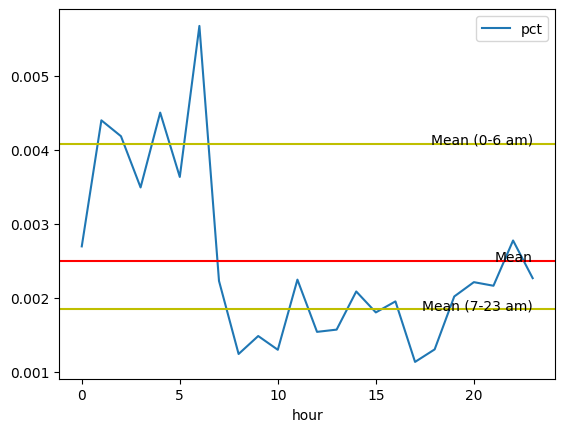

In [535]:
data = {"hour": [], "pct": []}
time = pd.DataFrame(data)

for i in range(0, 24):
    result = eda_train[eda_train["hour"] == i].copy()
    new_row = pd.DataFrame({"hour": [i], "pct": [np.mean(result["Class"])] })
    time = pd.concat([time, new_row])

time.plot(x="hour", y="pct", kind="line")

mean_pct = np.mean(time["pct"])
plt.axhline(y=mean_pct, color="r")
plt.text(time["hour"].iloc[-1], mean_pct, "Mean", ha="right")

mean_pct = np.mean(time[time["hour"] < 7]["pct"])
plt.axhline(y=mean_pct, color="y")
plt.text(time["hour"].iloc[-1], mean_pct, "Mean (0-6 am)", ha="right")

mean_pct = np.mean(time[time["hour"] >= 7]["pct"])
plt.axhline(y=mean_pct, color="y")
plt.text(time["hour"].iloc[-1], mean_pct, "Mean (7-23 am)", ha="right")

plt.show()

Now I Split the training set into DAY 0 and DAY 1.

Day 0

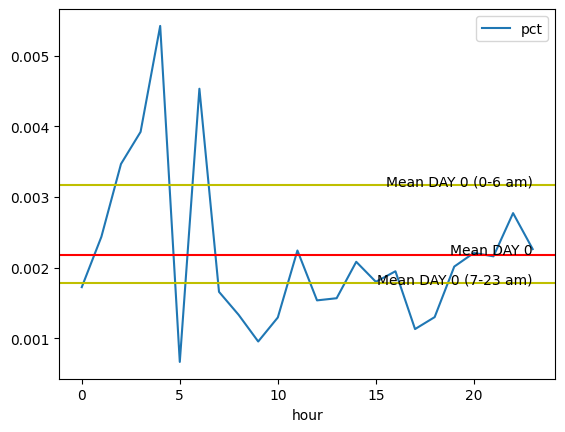

In [468]:
data = {"hour": [], "pct": []}
time = pd.DataFrame(data)

eda_train_day0 = eda_train[eda_train["day"] == 0].copy()

for i in range(0, 24):
    result = eda_train_day0[eda_train_day0["hour"] == i].copy()
    new_row = pd.DataFrame({"hour": [i], "pct": [np.mean(result["Class"])] })
    time = pd.concat([time, new_row])

time.plot(x="hour", y="pct", kind="line")


mean_pct = np.mean(time["pct"])
plt.axhline(y=mean_pct, color="r")
plt.text(time["hour"].iloc[-1], mean_pct, "Mean DAY 0", ha="right")


mean_pct = np.mean(time[time["hour"] < 7]["pct"])
plt.axhline(y=mean_pct, color="y")
plt.text(time["hour"].iloc[-1], mean_pct, "Mean DAY 0 (0-6 am)", ha="right")

mean_pct = np.mean(time[time["hour"] >= 7]["pct"])
plt.axhline(y=mean_pct, color="y")
plt.text(time["hour"].iloc[-1], mean_pct, "Mean DAY 0 (7-23 am)", ha="right")

plt.show()

In [469]:
print("Day 0 average:", np.mean(time["pct"]))

Day 0 average: 0.002185667523478999


Day 1 (0 am - 9 am)

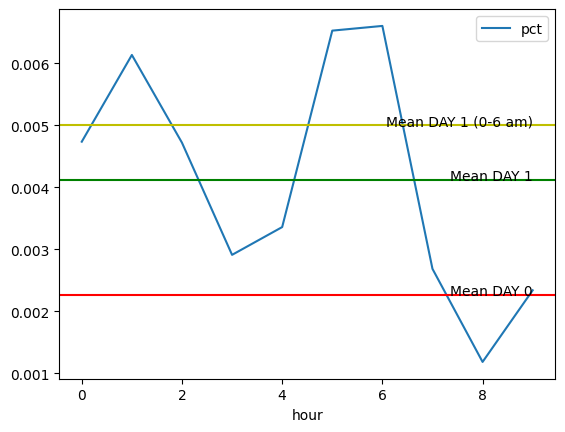

In [470]:
data = {"hour": [], "pct": []}
time = pd.DataFrame(data)

eda_train_day1 = eda_train[eda_train["day"] == 1].copy()

for i in range(0, 10):
    result = eda_train_day1[eda_train_day1["hour"] == i].copy()
    new_row = pd.DataFrame({"hour": [i], "pct": [np.mean(result["Class"])] })
    time = pd.concat([time, new_row])

time.plot(x="hour", y="pct", kind="line")

mean_pct = 0.002263521563021206
plt.axhline(y=mean_pct, color="r")
plt.text(time["hour"].iloc[-1], mean_pct, "Mean DAY 0", ha="right")

mean_pct = np.mean(time[time["hour"] < 7]["pct"])
plt.axhline(y=mean_pct, color="y")
plt.text(time["hour"].iloc[-1], mean_pct, "Mean DAY 1 (0-6 am)", ha="right")

mean_pct = np.mean(time["pct"])
plt.axhline(y=mean_pct, color="g")
plt.text(time["hour"].iloc[-1], mean_pct, "Mean DAY 1", ha="right")

plt.show()

### 2. Outliers (V1-V28)

Conclusion: The outliers of V1-V28 variables are related to fraudulent transactions

(But I don"t know how to handle the outlier)

I define the outlier as two tailed 0.01. 

In [471]:
eda_train2 = train_set.copy()
eda_train2.drop(columns = ["Time", "Class", "Amount"], inplace = True)

In [472]:
# Calculate 0.1% and 99.9% quantiles
quantiles = {}
for col in eda_train2.columns:
    quantiles[col] = (eda_train2[col].quantile(0.005), eda_train2[col].quantile(0.995))

# replace the outlier as 1
def replace_with_binary(x, q):
    if x < q[0] or x > q[1]:
        return 1
    else:
        return 0
    
new_df = pd.DataFrame()

for col in eda_train2.columns:
    new_col = col + "_outlier"
    new_df[new_col] = eda_train2[col].apply(replace_with_binary, q=quantiles[col])

new_df["sum_outlier"] = new_df.sum(axis=1)


new_df["Class"] = train_set["Class"]
pd.DataFrame(new_df).head()

,V1_outlier,V2_outlier,V3_outlier,V4_outlier,V5_outlier,V6_outlier,V7_outlier,V8_outlier,V9_outlier,V10_outlier,...,V21_outlier,V22_outlier,V23_outlier,V24_outlier,V25_outlier,V26_outlier,V27_outlier,V28_outlier,sum_outlier,Class
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Percentage of fraudulent transactions for outlier of each variable 

*Day 0 average: 0.2185%

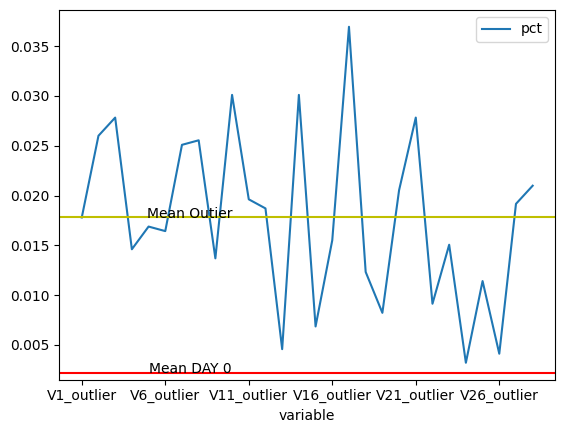

In [473]:
pct_outlier = pd.DataFrame({"variable": [], "pct": []})

for col in new_df.columns:
   outlier = new_df[new_df[col] == 1]
   new_row = pd.DataFrame({"variable": [col], "pct": [outlier["Class"].mean()]  })
   pct_outlier = pd.concat([pct_outlier, new_row])

pct_outlier = pct_outlier[:-2]

pct_outlier.plot(x="variable", y="pct", kind="line")


mean_pct = 0.0021856
plt.axhline(y=mean_pct, color="r")
plt.text(time["hour"].iloc[-1], mean_pct, "Mean DAY 0", ha="right")

mean_pct = pct_outlier["pct"].mean()
plt.axhline(y=mean_pct, color="y")
plt.text(time["hour"].iloc[-1], mean_pct, "Mean Outier", ha="right")


plt.show()

In [462]:
for col in new_df.columns:
   outlier = new_df[new_df[col] == 1]
   print(col, round(outlier["Class"].mean() * 100, 2), "%")

V1_outlier 1.78 %
V2_outlier 2.6 %
V3_outlier 2.78 %
V4_outlier 1.46 %
V5_outlier 1.69 %
V6_outlier 1.64 %
V7_outlier 2.51 %
V8_outlier 2.55 %
V9_outlier 1.37 %
V10_outlier 3.01 %
V11_outlier 1.96 %
V12_outlier 1.87 %
V13_outlier 0.46 %
V14_outlier 3.01 %
V15_outlier 0.68 %
V16_outlier 1.55 %
V17_outlier 3.7 %
V18_outlier 1.23 %
V19_outlier 0.82 %
V20_outlier 2.05 %
V21_outlier 2.78 %
V22_outlier 0.91 %
V23_outlier 1.51 %
V24_outlier 0.32 %
V25_outlier 1.14 %
V26_outlier 0.41 %
V27_outlier 1.92 %
V28_outlier 2.1 %
sum_outlier 0.22 %
Class 100.0 %


Filter out the data with the most outliers (99.5% quantile)

In [474]:
pct = new_df["sum_outlier"].quantile(0.995)
pct


6.0

When the transaction data includes a large number of outliers (equals or more than 6), the probability of the transaction being a fraudulent transaction significantly increases, which is 22 times the average.

Therefore, we not only cannot remove outliers, but also pay more attention to outliers.

In [475]:
outlier_ = new_df[new_df["sum_outlier"] >= 6]
print(round(outlier_["Class"].mean()* 100 , 4), "%")


4.8035 %


### 3. Amount

It seems that small amount are more likely to be fraudulent transactions.

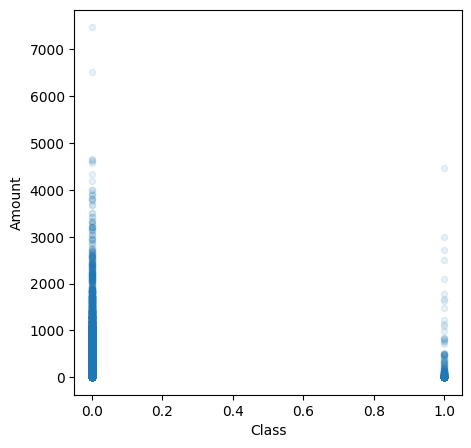

In [477]:
eda_train3 = eda_train.copy()
plot = eda_train3.plot(kind="scatter", x="Class", y="Amount", alpha=0.1, figsize=(5,5))
plt.show()


Fraudulent transactions are twice the average.

But what about the large transactions?

In [534]:
qt1 = eda_train3["Amount"].quantile(0.00)
qt2 = eda_train3["Amount"].quantile(0.05)
print("Amount:[", round(qt1,2), ",",round(qt2,2), "] Fraudulent transactions Pct:", round(np.mean(eda_train3[eda_train3["Amount"] <qt2]["Class"])*100, 4), "%")

qt1 = eda_train3["Amount"].quantile(0.99)
qt2 = eda_train3["Amount"].quantile(1)
print("Amount:[", round(qt1,2), ",",round(qt2,2), "] Fraudulent transactions Pct:", round(np.mean(eda_train3[eda_train3["Amount"] >qt1]["Class"])*100, 4), "%")

qt1 = eda_train3["Amount"].quantile(0.999)
qt2 = eda_train3["Amount"].quantile(1)
print("Amount:[", round(qt1,2), ",",round(qt2,2), "] Fraudulent transactions Pct:", round(np.mean(eda_train3[eda_train3["Amount"] >qt1]["Class"])*100, 4), "%")

qt1 = eda_train3["Amount"].quantile(0.9995)
qt2 = eda_train3["Amount"].quantile(1)
print("Amount:[", round(qt1,2), ",",round(qt2,2), "] Fraudulent transactions Pct:", round(np.mean(eda_train3[eda_train3["Amount"] >qt1]["Class"])*100, 4), "%")

Amount:[ 0.0 , 0.99 ] Fraudulent transactions Pct: 0.5744 %
Amount:[ 665.79 , 7475.0 ] Fraudulent transactions Pct: 0.9124 %
Amount:[ 1736.48 , 7475.0 ] Fraudulent transactions Pct: 2.7273 %
Amount:[ 2249.08 , 7475.0 ] Fraudulent transactions Pct: 3.6364 %


Large transactions seem more likely to be fraudulent transactions.